# Model Evaluations


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import  accuracy_score ,mean_squared_error , mean_absolute_error ,r2_score

# Load Linear Model


In [9]:
# loading thee preprocessed data @sabinvankathmandu
linear_model = joblib.load("../model/linear_regression_model.pkl")

In [ ]:
# loading thee preprocessed data @sabinvankathmandu
X_train = pd.read_pickle("../data/X_train.pkl")
X_test = pd.read_pickle("../data/X_test.pkl")
y_train = pd.read_pickle("../data/y_train.pkl")
y_test = pd.read_pickle("../data/y_test.pkl")

In [35]:
# Linear model predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)



In [36]:
y_test_pred

array([24.72631125, 24.82749779, 24.0832007 , 10.10688697, 18.94881514,
       14.2378382 , 15.5025967 , 25.65050258, 21.1615433 , 20.21680328,
       32.27559738, 23.40412133, 12.6321619 , 24.49040847, 20.12194854,
       18.2908035 , 25.70829398, 24.35544166, 22.07776991, 19.5335571 ,
       23.38100417, 22.49495995, 19.91402686, 22.5583237 , 20.98556762,
       19.88461902, 17.31838721, 22.84606314, 26.87724106, 14.54170986,
       25.80038473, 25.26518319, 26.44243905, 18.31358941, 19.88623605,
       24.56331666, 19.30498549, 20.97457886, 25.49404248, 30.63810392,
       24.84515837, 24.16834651, 10.85036471, 22.34656989, 12.26693737,
       16.74101534, 23.79030429, 10.59891825, 20.97991806, 24.27193634,
       23.37075618, 13.12384445, 20.63417268])

# Evaluate Linear Regression

In [37]:
# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_test_pred)
mse_lr = mean_squared_error(y_test, y_test_pred)
r2_lr = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse_lr)

print(f"Linear Regression MAE {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f} RMSE {rmse:.4f}")

Linear Regression MAE 1.8104, MSE: 5.8103, R²: 0.7128 RMSE 2.4104


# Visualize actual vs precited linear regression

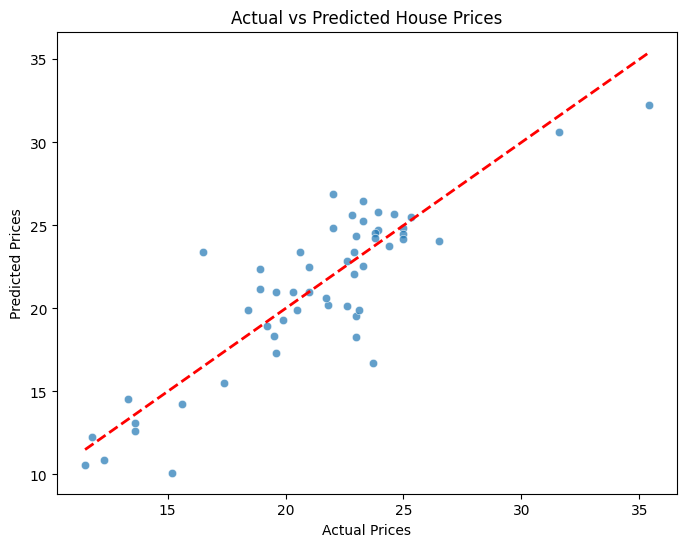

In [38]:
# Creating the actual vs predicted price linear plot @sabinvankathmandu
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", lw=2)  # Identity line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# loading lasso and ridge models


In [25]:
# Load the saved models
ridge_best = joblib.load("../model/ridge_model.pkl")
lasso_best = joblib.load("../model/lasso_model.pkl")

print("Ridge and Lasso models loaded!")

Ridge and Lasso models loaded!


In [26]:
# make predictions
# Ridge Model Predictions
y_pred_ridge = ridge_best.predict(X_test)

# Lasso Model Predictions
y_pred_lasso = lasso_best.predict(X_test)


# Evaluate Ridge Model


In [27]:
# Evaluate Ridge Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display Results
print(f"Ridge Model MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Lasso Model MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")


Ridge Model MSE: 5.7951, R²: 0.7135
Lasso Model MSE: 5.7734, R²: 0.7146


# Visualize Actual vs Predicted Values

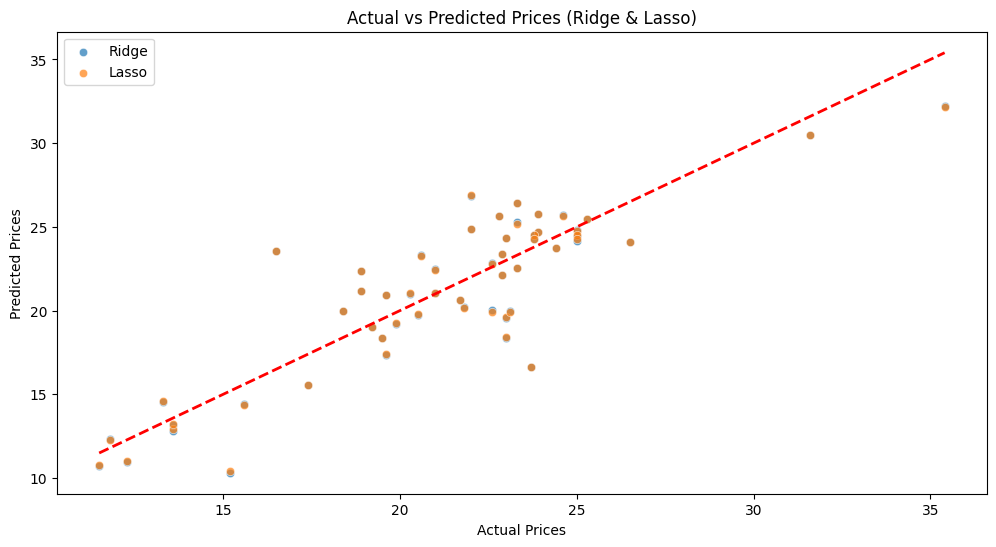

In [28]:
plt.figure(figsize=(12, 6))

# Ridge Model: Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge", alpha=0.7)

# Lasso Model: Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred_lasso, label="Lasso", alpha=0.7)

# Identity Line (for reference)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", lw=2)

# Titles and labels
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Ridge & Lasso)")
plt.legend()
plt.show()

# Residual analysis

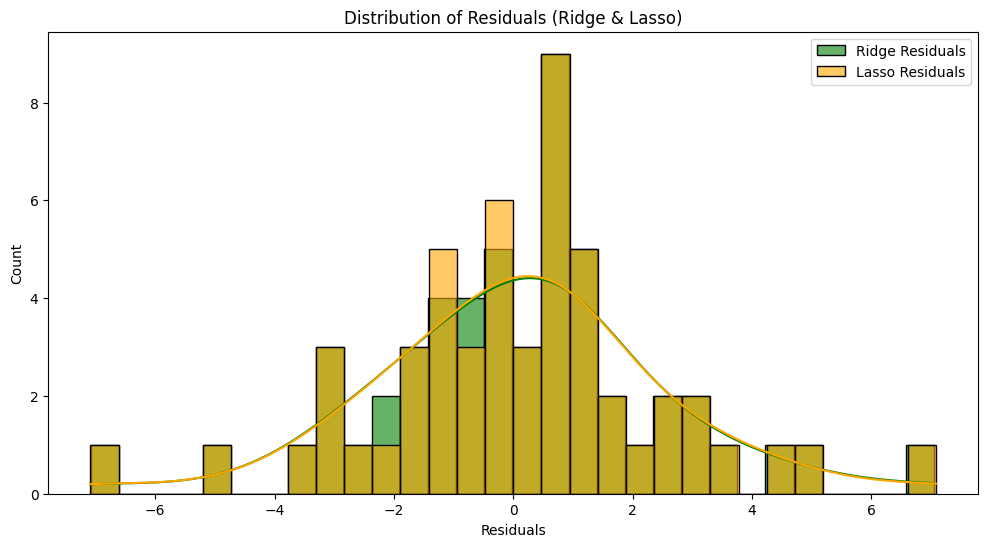

In [29]:
plt.figure(figsize=(12, 6))

# Ridge Residuals
sns.histplot(y_test - y_pred_ridge, bins=30, kde=True, color="green", label="Ridge Residuals", alpha=0.6)

# Lasso Residuals
sns.histplot(y_test - y_pred_lasso, bins=30, kde=True, color="orange", label="Lasso Residuals", alpha=0.6)

plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Ridge & Lasso)")
plt.legend()
plt.show()


# Feature Importance (Ridge and Lasso Models)

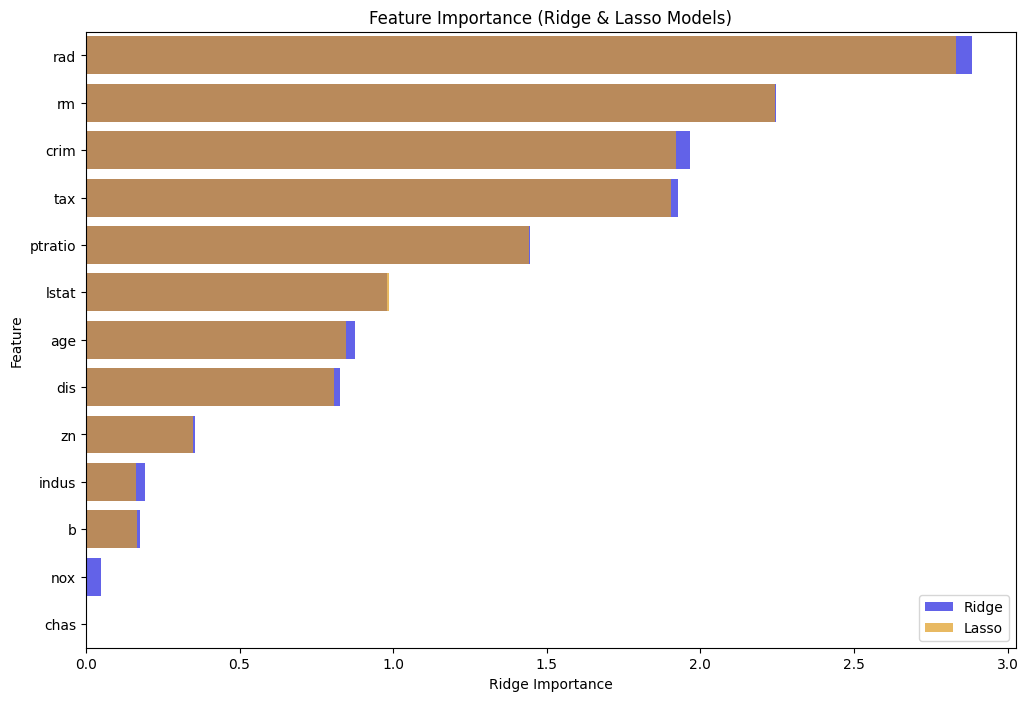

In [30]:
# Get feature names
feature_names = X_train.columns

# Get coefficients for Ridge and Lasso models
ridge_coefs = ridge_best.coef_
lasso_coefs = lasso_best.coef_

# Create DataFrame for easier comparison
coefs_df = pd.DataFrame({
    "Feature": feature_names,
    "Ridge Coefficients": ridge_coefs,
    "Lasso Coefficients": lasso_coefs
})

# Sort by absolute importance
coefs_df['Ridge Importance'] = np.abs(coefs_df['Ridge Coefficients'])
coefs_df['Lasso Importance'] = np.abs(coefs_df['Lasso Coefficients'])
coefs_df_sorted = coefs_df.sort_values(by="Ridge Importance", ascending=False)

# Plot Feature Importance (Ridge & Lasso)
plt.figure(figsize=(12, 8))
sns.barplot(x="Ridge Importance", y="Feature", data=coefs_df_sorted, color="blue", label="Ridge", alpha=0.7)
sns.barplot(x="Lasso Importance", y="Feature", data=coefs_df_sorted, color="orange", label="Lasso", alpha=0.7)
plt.title("Feature Importance (Ridge & Lasso Models)")
plt.legend()
plt.show()


# Save evaluatoins results


In [32]:
# Create a DataFrame for the results
results_df = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [mse_ridge, mse_lasso],
    "R²": [r2_ridge, r2_lasso]
})

# Save results to CSV
results_df.to_csv("../model/ridge_lasso_evaluation_results.csv", index=False)
print("Evaluation results saved to CSV!")


Evaluation results saved to CSV!
